In [1]:
from ipfnpytools.rhosep2 import rhosep2
from ipfnpytools.trhopz_to_r import trhopz_to_r
import matplotlib.pyplot as plt
import numpy as np

19:30:47 | aug_sfutils | INFO: Using version 0.8.0
19:30:47 | aug_sfutils.ww | INFO: WW loaded
19:30:47 | aug_sfutils.sfh | INFO: SFH loaded
19:30:48 | aug_sfutils.mapeq | INFO: AUG-SF home /shares/software/aug-dv/moduledata/aug_sfutils/0.8.0/aug_sfutils


# Get the 2nd separatrix normalized poloidal flux coordinate

19:30:48 | aug_sfutils.sfread | INFO: Fetching SF /shares/experiments/aug-shotfiles/augd/IDG/40/40260.2
19:30:48 | aug_sfutils.sfread | INFO: Fetching SF /shares/experiments/aug-shotfiles/augd/IDG/40/40260.2
19:30:48 | aug_sfutils.sfread | INFO: Fetching SF /shares/experiments/aug-shotfiles/augd/IDG/40/40260.2


Text(0.5, 0, 'Time [s]')

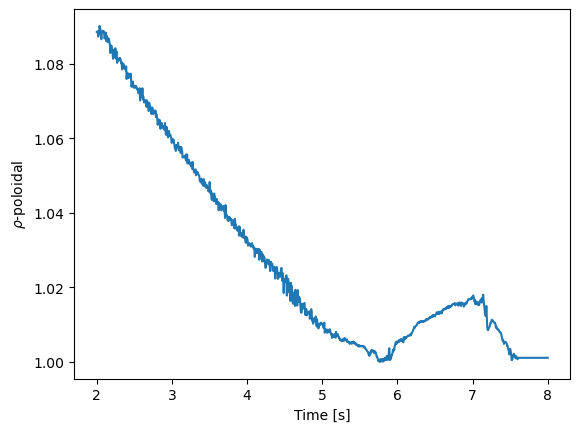

In [2]:
times = np.linspace(2, 8, 1000)
shot = 40260

# Always use the IDE equilibrium shotfile
# The alternative EQH equilibrium is less accurate
# If the IDE equilibrium is not available, request it from Rainer Fischer and temporarily use the EQH equilibrium instead
equilibrium_shotfile = 'IDE'

if equilibrium_shotfile == 'IDE':
    equilibrium_parameters_shotfile = 'IDG'
elif equilibrium_shotfile == 'EQH':
    equilibrium_parameters_shotfile = 'GQH'

rho = rhosep2(shot, times, equil=equilibrium_parameters_shotfile)

plt.figure()
plt.plot(times, rho)
plt.ylabel(r'$\rho$-poloidal')
plt.xlabel('Time [s]')

# Convert from flux to radial position at the inner and out midplane

19:32:01 | aug_sfutils.sfread | INFO: Fetching SF /shares/experiments/aug-shotfiles/augd/IDE/40/40260.2
19:32:01 | aug_sfutils.sf2equ | INFO: Reading equ scalars
19:32:01 | aug_sfutils.sf2equ | INFO: Reading equ 1d profiles
19:32:01 | aug_sfutils.sf2equ | INFO: Reading equ PFM
19:32:01 | aug_sfutils.sf2equ | INFO: COCO 17


Optimus prime


Text(0.5, 0, 'Time [s]')

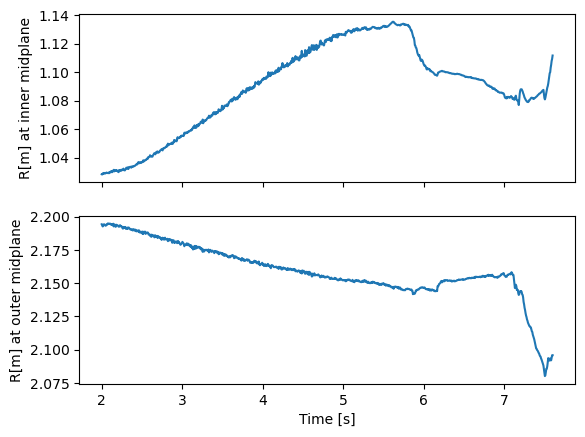

In [5]:
sep2_inner_midplane, sep2_outer_midplane = trhopz_to_r(times, rho, 0, equilibrium=equilibrium_shotfile, shot=shot)

fig, axes = plt.subplots(2, 1, sharex=True)
plt.sca(axes[0])
plt.plot(times, sep2_inner_midplane, label='Inner midplane')
plt.ylabel('R[m] at inner midplane')

plt.sca(axes[1])
plt.plot(times, sep2_outer_midplane, label='Outer midplane')
plt.ylabel('R[m] at outer midplane')

plt.xlabel('Time [s]')